# **Association Rule**

In [1]:
#Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [2]:
df=pd.read_csv("my_movies.csv")

In [3]:
data=df.drop(columns=["V1","V2","V3","V4","V5"])  #As data is in already in binary form so dropped only unnecessary columns
data

Sixth Sense  Gladiator  LOTR1  ...  LOTR  Braveheart  Green Mile
0            1          0      1  ...     0           0           1
1            0          1      0  ...     0           1           0
2            0          0      1  ...     0           0           0
3            1          1      0  ...     0           0           0
4            1          1      0  ...     0           0           0
5            1          1      0  ...     0           0           0
6            0          0      0  ...     0           0           0
7            0          1      0  ...     0           0           0
8            1          1      0  ...     0           0           0
9            1          1      0  ...     1           0           1

[10 rows x 10 columns]

**Rule 1**

In [4]:
frequant=apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets=frequant.sort_values('support',ascending=False)   #using movies with having 10% support and more and making rules
frequent_itemsets

support                                           itemsets
1       0.7                                        (Gladiator)
0       0.6                                      (Sixth Sense)
4       0.6                                          (Patriot)
17      0.6                               (Patriot, Gladiator)
10      0.5                           (Gladiator, Sixth Sense)
30      0.4                  (Patriot, Gladiator, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
9       0.2                                       (Green Mile)
22      0.2                                     (LOTR1, LOTR2)
16      0.2                          (Green Mile, Sixth Sense)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
5       0.2                                            (LOTR2)
49      0.1            (LOTR1, Green Mile, Sixth Sense, LOTR2)
48      0.1    (LOTR1, Green Mile, Harry Potter1, Sixth Sense)
35      0.1                   (LOTR1, Green Mile, Sixth Sense)
36      0.1                (Harry Potter1, Sixth Sense, LOTR2)
37      0.1           (Green Mile, Harry Potter1, Sixth Sense)
38      0.1                   (Green Mile, Sixth Sense, LOTR2)
39      0.1                    (Green Mile, LOTR, Sixth Sense)
40      0.1                   (Patriot, Braveheart, Gladiator)
41      0.1                      (Green Mile, LOTR, Gladiator)
42      0.1                      (LOTR1, Harry Potter1, LOTR2)
43      0.1                 (LOTR1, Green Mile, Harry Potter1)
44      0.1                         (LOTR1, Green Mile, LOTR2)
51      0.1          (LOTR1, Green Mile, Harry Potter1, LOTR2)
33      0.1                (LOTR1, Harry Potter1, Sixth Sense)
45      0.1                 (Green Mile, Harry Potter1, LOTR2)
46      0.1         (Gladiator, LOTR, Sixth Sense, Green Mile)
50      0.1    (Green Mile, Harry Potter1, Sixth Sense, LOTR2)
47      0.1         (LOTR1, Harry Potter1, Sixth Sense, LOTR2)
34      0.1                        (LOTR1, Sixth Sense, LOTR2)
26      0.1                        (Green Mile, Harry Potter1)
32      0.1               (Gladiator, Sixth Sense, Green Mile)
31      0.1                     (Gladiator, LOTR, Sixth Sense)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
11      0.1                               (LOTR1, Sixth Sense)
12      0.1                       (Harry Potter1, Sixth Sense)
14      0.1                               (Sixth Sense, LOTR2)
15      0.1                                (LOTR, Sixth Sense)
18      0.1                                  (LOTR, Gladiator)
19      0.1                            (Braveheart, Gladiator)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (LOTR1, Harry Potter1)
23      0.1                                (LOTR1, Green Mile)
24      0.1                             (Harry Potter1, LOTR2)
25      0.1                     (Harry Potter2, Harry Potter1)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (Green Mile, LOTR2)
29      0.1                                 (Green Mile, LOTR)
52      0.1  (Green Mile, LOTR1, Sixth Sense, LOTR2, Harry ...

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """Entry point for launching an IPython kernel.


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text major ticklabel objects>)

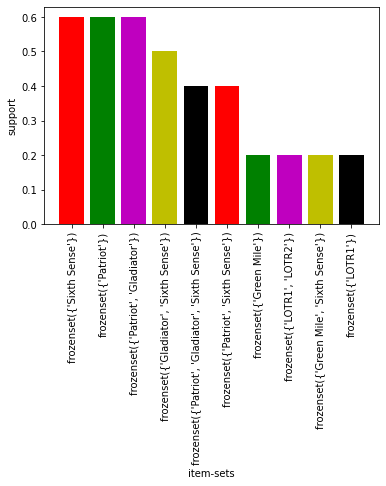

In [5]:
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets')
plt.ylabel('support')
plt.xticks(rotation=90)


In [6]:
rules=association_rules(frequant,metric="lift",min_threshold=1)
rules

antecedents  ... conviction
0        (Gladiator)  ...       1.40
1      (Sixth Sense)  ...       1.80
2          (Patriot)  ...       1.20
3      (Sixth Sense)  ...       1.20
4             (LOTR)  ...        inf
..               ...  ...        ...
233     (Green Mile)  ...       1.80
234          (LOTR1)  ...       1.80
235    (Sixth Sense)  ...       1.08
236          (LOTR2)  ...       1.80
237  (Harry Potter1)  ...       1.80

[238 rows x 9 columns]

In [7]:
rules[rules["lift"]==1] #hence those antecedent and support are independent we will remove those rules

antecedents               consequents  ...  leverage  conviction
44  (Sixth Sense, Gladiator)              (Green Mile)  ...       0.0         1.0
47              (Green Mile)  (Sixth Sense, Gladiator)  ...       0.0         1.0

[2 rows x 9 columns]

In [8]:
rules.drop([45,46],inplace=True)


In [9]:
rules[rules["confidence"]>0.8]

antecedents  ... conviction
1                   (Sixth Sense)  ...        1.8
4                          (LOTR)  ...        inf
6                    (Green Mile)  ...        inf
8                       (Patriot)  ...        inf
9                     (Gladiator)  ...        2.8
..                            ...  ...        ...
227          (LOTR1, Sixth Sense)  ...        inf
229        (LOTR1, Harry Potter1)  ...        inf
230          (Sixth Sense, LOTR2)  ...        inf
231  (Harry Potter1, Sixth Sense)  ...        inf
232        (Harry Potter1, LOTR2)  ...        inf

[126 rows x 9 columns]

**Rule 2**

In [10]:
frequant2=apriori(data,min_support=0.2,use_colnames=True)
frequent_itemsets2=frequant2.sort_values('support',ascending=False)   #using movies with having 20% and more support and making rules
frequent_itemsets2

support                           itemsets
1       0.7                        (Gladiator)
0       0.6                      (Sixth Sense)
4       0.6                          (Patriot)
10      0.6               (Patriot, Gladiator)
7       0.5           (Gladiator, Sixth Sense)
8       0.4             (Patriot, Sixth Sense)
12      0.4  (Patriot, Gladiator, Sixth Sense)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
9       0.2          (Green Mile, Sixth Sense)
11      0.2                     (LOTR1, LOTR2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """Entry point for launching an IPython kernel.


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text major ticklabel objects>)

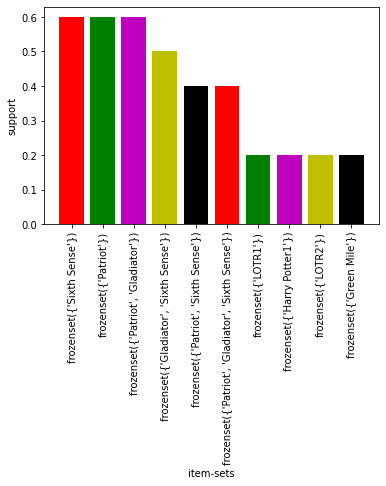

In [11]:
plt.bar(x = list(range(1,11)),height = frequent_itemsets2.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_itemsets2.itemsets[1:11])
plt.xlabel('item-sets')
plt.ylabel('support')
plt.xticks(rotation=90)

In [12]:
rules2=association_rules(frequant2,metric="lift",min_threshold=1)
rules2

antecedents               consequents  ...  leverage  conviction
0                (Gladiator)             (Sixth Sense)  ...      0.08         1.4
1              (Sixth Sense)               (Gladiator)  ...      0.08         1.8
2                  (Patriot)             (Sixth Sense)  ...      0.04         1.2
3              (Sixth Sense)                 (Patriot)  ...      0.04         1.2
4               (Green Mile)             (Sixth Sense)  ...      0.08         inf
5              (Sixth Sense)              (Green Mile)  ...      0.08         1.2
6                  (Patriot)               (Gladiator)  ...      0.18         inf
7                (Gladiator)                 (Patriot)  ...      0.18         2.8
8                    (LOTR1)                   (LOTR2)  ...      0.16         inf
9                    (LOTR2)                   (LOTR1)  ...      0.16         inf
10      (Patriot, Gladiator)             (Sixth Sense)  ...      0.04         1.2
11    (Patriot, Sixth Sense)               (Gladiator)  ...      0.12         inf
12  (Sixth Sense, Gladiator)                 (Patriot)  ...      0.10         2.0
13                 (Patriot)  (Sixth Sense, Gladiator)  ...      0.10         1.5
14               (Gladiator)    (Patriot, Sixth Sense)  ...      0.12         1.4
15             (Sixth Sense)      (Patriot, Gladiator)  ...      0.04         1.2

[16 rows x 9 columns]

In [13]:
rules2[rules2["lift"]==1] #hence there antecedent and cosequents are not present

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [14]:
rules2[rules2["confidence"]>0.8]

antecedents    consequents  ...  leverage  conviction
1            (Sixth Sense)    (Gladiator)  ...      0.08         1.8
4             (Green Mile)  (Sixth Sense)  ...      0.08         inf
6                (Patriot)    (Gladiator)  ...      0.18         inf
7              (Gladiator)      (Patriot)  ...      0.18         2.8
8                  (LOTR1)        (LOTR2)  ...      0.16         inf
9                  (LOTR2)        (LOTR1)  ...      0.16         inf
11  (Patriot, Sixth Sense)    (Gladiator)  ...      0.12         inf

[7 rows x 9 columns]

**Rule 3**

In [15]:
frequant3=apriori(data,min_support=0.5,use_colnames=True)
frequent_itemsets3=frequant3.sort_values('support',ascending=False)   #using movies with having 50% and mone support and making rules
frequent_itemsets3

support                  itemsets
1      0.7               (Gladiator)
0      0.6             (Sixth Sense)
2      0.6                 (Patriot)
4      0.6      (Patriot, Gladiator)
3      0.5  (Gladiator, Sixth Sense)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """Entry point for launching an IPython kernel.


(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

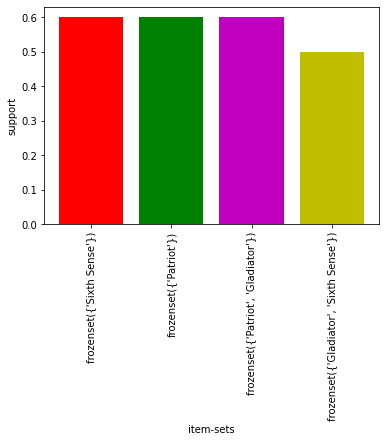

In [16]:
plt.bar(x = list(range(1,5)),height = frequent_itemsets3.support[1:5],color='rgmyk')
plt.xticks(list(range(1,5)),frequent_itemsets3.itemsets[1:5])
plt.xlabel('item-sets')
plt.ylabel('support')
plt.xticks(rotation=90)

In [17]:
rules3=association_rules(frequant3,metric="lift",min_threshold=1)   # as we see there is no independence variable here
rules3

antecedents    consequents  ...  leverage  conviction
0    (Gladiator)  (Sixth Sense)  ...      0.08         1.4
1  (Sixth Sense)    (Gladiator)  ...      0.08         1.8
2      (Patriot)    (Gladiator)  ...      0.18         inf
3    (Gladiator)      (Patriot)  ...      0.18         2.8

[4 rows x 9 columns]